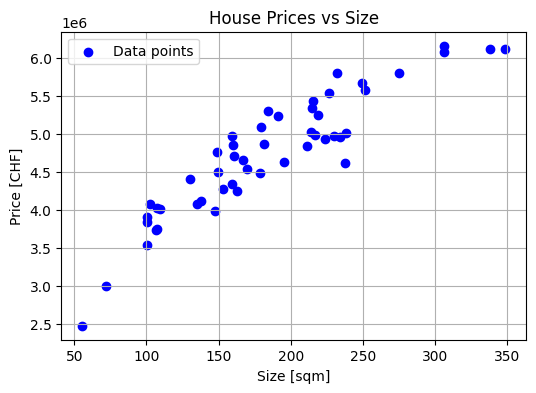

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils import load_house_data, plot_housing_prices, plot_fit_landscape_and_loss, \
    animate_gradient_descent, plot_loss_landscape

# load the housing prices data
sizes, prices, _ = load_house_data('data/housing_prices.txt')

# plot the data
plot_housing_prices(sizes, prices)

 x: [ 0.24791793  0.17844593  0.27043427 -0.16888472  0.14740107  0.16358637
 -0.13313405 -0.18635782 -0.41572154 -0.45368148 -0.19802315 -0.12709508
 -0.25129986 -0.41965912  0.2946621  -0.26661239  0.21728936 -0.0780182
 -0.45389731 -0.60813489 -0.02785375  0.06235688  0.29239856 -0.1166408
 -0.69780169  0.89395768  0.66546116  0.49340957 -0.09201366 -0.01507555
  0.35612121  0.36439571  0.83705528  0.00218812  0.16885468  0.66394981
 -0.1296752   0.25970233  0.22996258 -0.02599128 -0.45292915 -0.19199285
  0.0385347  -0.41710782 -0.29332245 -0.13418246  0.16739959 -0.40606728
  0.18956517 -0.4438765 ]
y: [ 0.05089697  0.05321905  0.04745989 -0.09788054  0.02245496  0.06292258
 -0.08234868 -0.04940933 -0.20716988 -0.25153939 -0.15887323 -0.00439085
 -0.12967478 -0.21037986  0.06011369 -0.13933695  0.04204619 -0.04226702
 -0.18900067 -0.36663575 -0.05129047 -0.02255172 -0.024418   -0.10126375
 -0.4766614   0.29285041  0.28461073  0.22492636 -0.01513947  0.02781062
  0.19759108  0.1785

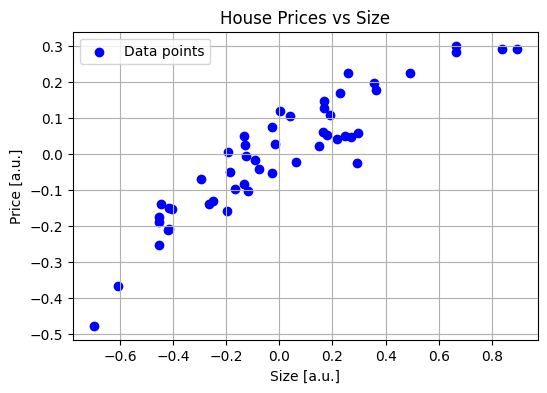

In [3]:
# scale the data such that the features are centered around zero and have reasonable range
####### YOUR CODE HERE #######
x = (sizes - np.mean(sizes))/np.mean(sizes)
y = (prices - np.mean(prices))/np.mean(prices)
print(" x:", x)
print("y:", y)
# plot the scaled data
plot_housing_prices(x, y, scaled=True)

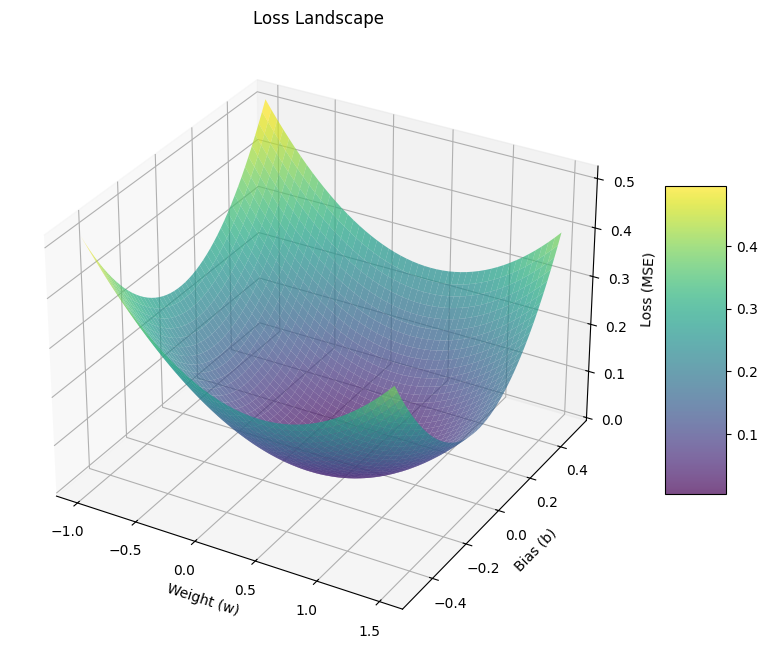

In [4]:
# Calculate loss (Mean Squared Error) for each combination of w and b
def calculate_loss(w, b, x_data, y_data):   #y=wx+b
    ####### YOUR CODE HERE #######
    y_pred = w*x_data + b
    loss = np.mean(((y_pred- y_data)**2))
    ###### END YOUR CODE ########
    return loss

# Create ranges for w and b to plot the loss surface
w_range = np.linspace(-1, 1.5, 50)
b_range = np.linspace(-0.5, 0.5, 50)
W, B = np.meshgrid(w_range, b_range)

# Calculate loss for each combination of w and b
Loss = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Loss[i, j] = calculate_loss(W[i, j], B[i, j], x, y)

# Plot the loss surface and the data points
plot_loss_landscape(W, B, Loss)

In [ ]:

# Perform gradient descent to get optimization path
def gradient_descent_path(x_data, y_data, learning_rate=0.01, n_iterations=20):
    """Perform gradient descent and return the path"""
    # Initialize parameters (this would typically be random)
    w = 0.2
    b = 0.3
    
    # Store path
    w_path = [w]
    b_path = [b]
    loss_path = [calculate_loss(w, b, x_data, y_data)]
    
    for i in range(n_iterations):
        ###### YOUR CODE HERE #######
        # Calculate predictions
        y_pred =  w*x_data + b
        
        # Calculate gradients
        dw = 2*np.mean((y_pred - y_data)*x_data)
        db = 2*np.mean(y_pred - y_data)
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        ###### END YOUR CODE ########
        
        # Store path
        w_path.append(w)
        b_path.append(b)
        loss_path.append(calculate_loss(w, b, x_data, y_data))
    
    return np.array(w_path), np.array(b_path), np.array(loss_path)


w_path, b_path, loss_path = gradient_descent_path(x, y, learning_rate=0.2, n_iterations=40)

anim = animate_gradient_descent(
    W, B, Loss, x, y, w_path, b_path, loss_path,
    # save_path="output/gradient-descent-animation.mp4",
)

from IPython.display import HTML
HTML(anim.to_jshtml())
